In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

In [2]:
# Load Saved Predictions and Labels
y_test = np.load("y_test.npy")
y_pred_lr = np.load("y_pred_lr.npy")
y_pred_rf = np.load("y_pred_rf.npy")

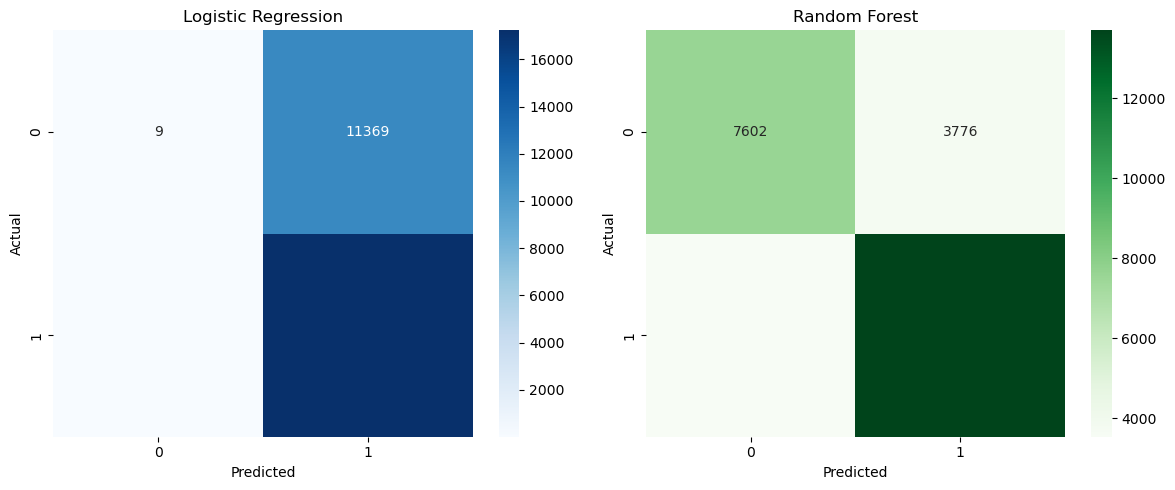

In [3]:
# Confusion Matrix Visualization
## Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

## Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

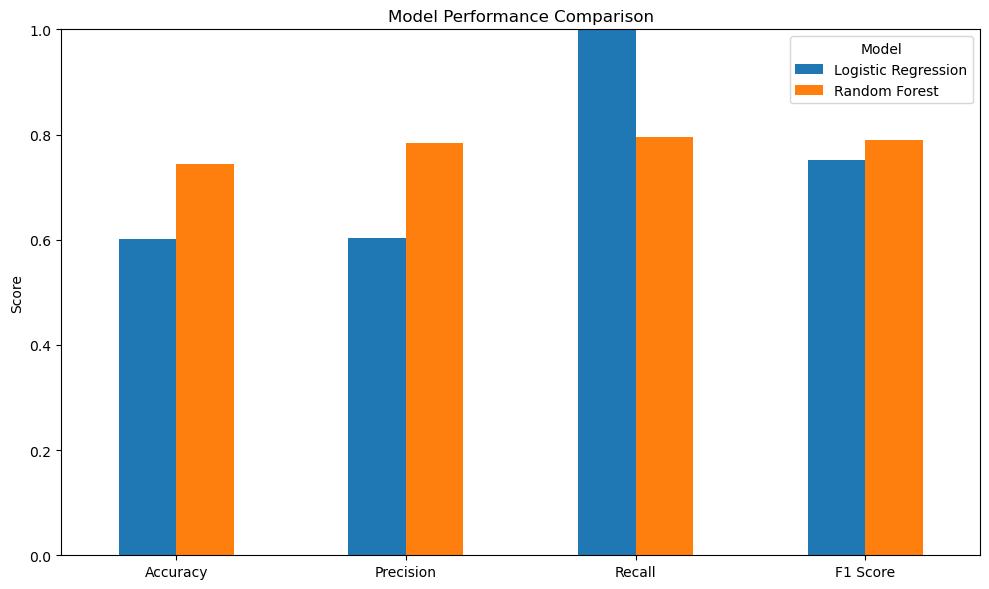

In [4]:
# Visual Comparison of Metrics
## Store metrics
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
}

## Convert to DataFrame
metrics_df = pd.DataFrame(metrics, index=["Logistic Regression", "Random Forest"])

## Plot
metrics_df.T.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [5]:
# Final Summary
print("🔍 Final Model Comparison Summary")

print("\n📊 Logistic Regression:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_lr):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_lr):.2f}")

print("\n🌲 Random Forest:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_rf):.2f}")


🔍 Final Model Comparison Summary

📊 Logistic Regression:
Accuracy:  0.60
Precision: 0.60
Recall:    1.00
F1 Score:  0.75

🌲 Random Forest:
Accuracy:  0.74
Precision: 0.78
Recall:    0.79
F1 Score:  0.79


🧾 Conclusion
Based on the comparison:

Random Forest performs better in terms of [e.g., F1 Score or Recall], which is important if we care more about catching churned customers.

Logistic Regression is simpler and more interpretable, but may not capture complex patterns.

🎯 Next Steps: Tune hyperparameters, try more models (like XGBoost), or analyze which features contribute most to churn.